In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import matplotlib as mpl
from cycler import cycler
monochrome = (cycler('color', ['k']) * cycler('linestyle', ['-', '--', ':', '-.', '_']) * cycler('marker', ['^',',', '.']))
dpi=200
mpl.rcParams['figure.dpi']= dpi

In [2]:
df = pd.read_csv('../data/original.csv')
df.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,0.472979,21.321526,13.064511,11.933317,-14.053139,25.645981
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,0.285787,8.639423,3.399713,2.893265,12.225582,10.450558
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,0.003220,7.027000,7.037800,7.030600,-35.287375,7.007900
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,0.224367,13.054400,10.417800,9.541140,-24.289522,17.189075
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,0.475989,21.907150,12.938450,11.953835,-14.622856,24.931950
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,0.704846,28.954075,15.889525,14.371810,-3.497094,33.979600
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082,0.998827,36.743900,19.324000,16.821080,6.972071,44.341200


ValueError: linestyle '_' is not a valid on-off ink sequence.

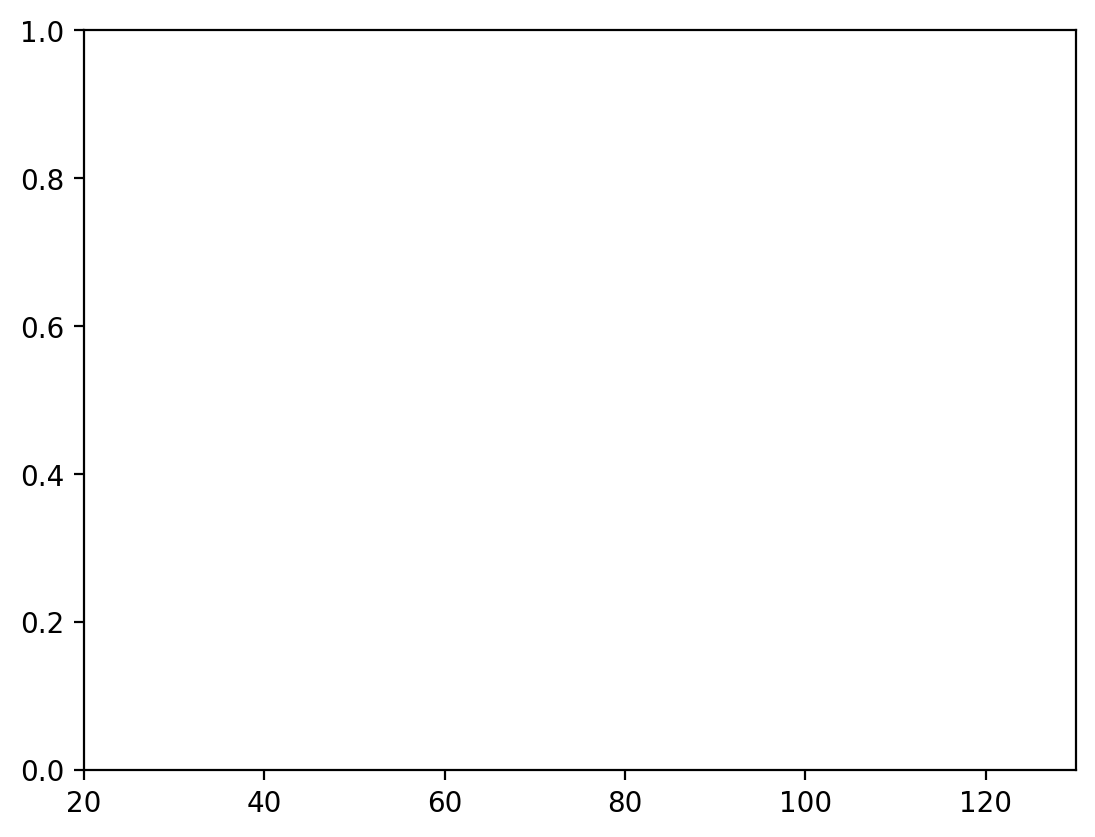

In [3]:
##################### PELVIC INCIDENCE ##########################
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
pi_normals = df.pelvic_incidence[df.Class_att == 'Normal']
pi_abnormals = df.pelvic_incidence[df.Class_att == 'Abnormal']

x_min = min(df.pelvic_incidence)
x_max = max(df.pelvic_incidence)
x_min = math.floor(x_min/10)*10
x_max = math.ceil(x_max/10)*10
ax1.set_xlim(x_min, x_max)

ax1.set_xlim(x_min, x_max)
ax1.set_prop_cycle(monochrome)
n, bins, patches = ax1.hist(pi_normals, alpha=0.2,hatch="o", density=True)
n, bins, patches = ax1.hist(pi_abnormals, alpha=0.2, hatch="x", density=True)


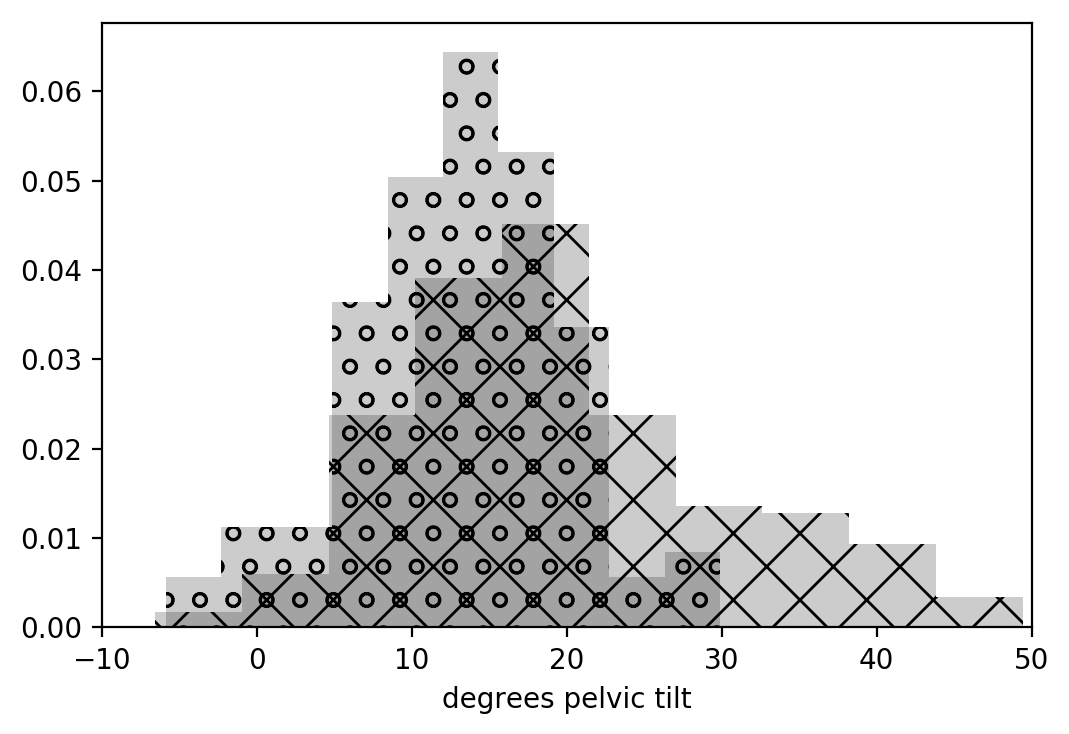

In [23]:
##################### PELVIC TILT ##########################
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
x_min = min(df.pelvic_tilt)
x_max = max(df.pelvic_tilt)

x_min = math.floor(x_min/10)*10
x_max = math.ceil(x_max/10)*10
ax1.set_xlim(x_min, x_max)
ax1.set_prop_cycle(monochrome)

plt.xlabel('degrees pelvic tilt')
n, bins, patches = ax1.hist(df.pelvic_tilt[df.Class_att == 'Normal'], hatch="o", alpha=0.2, density=True)
n, bins, patches = ax1.hist(df.pelvic_tilt[df.Class_att == 'Abnormal'], hatch="x", alpha=0.2, density=True)
plt.show()


7.0306
16.82108


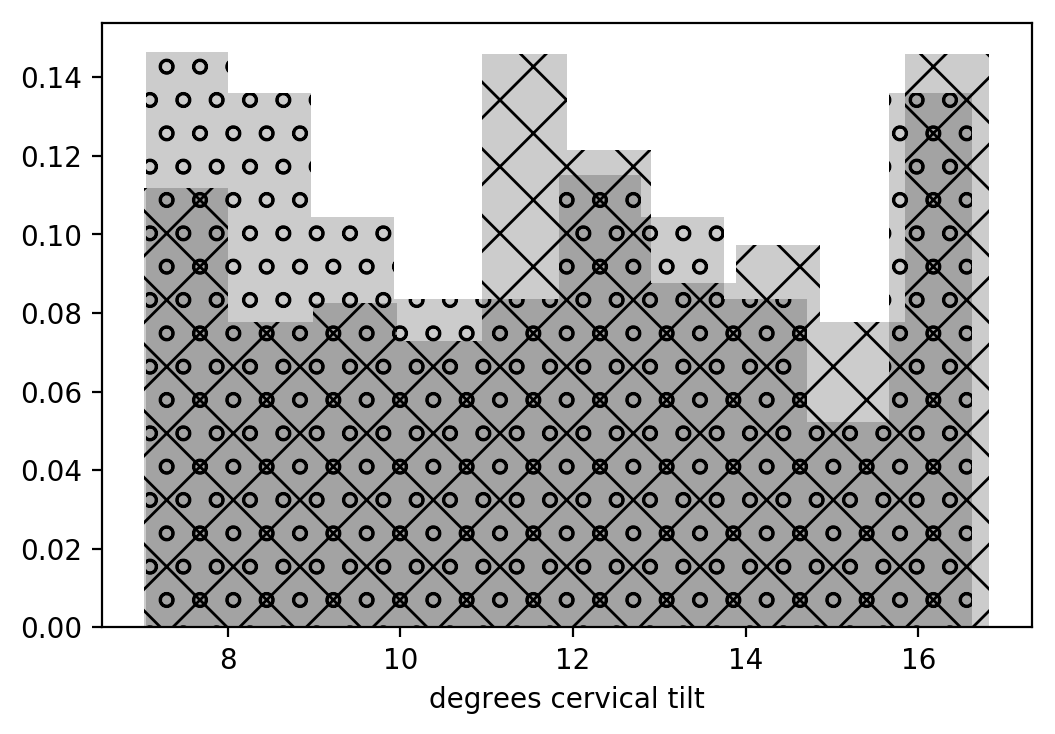

In [24]:
##################### CERVICAL TILT ##########################
x_min = min(df.cervical_tilt)
x_max = max(df.cervical_tilt)
print(x_min)
print(x_max)
x_min = math.floor(x_min/10)*10
x_max = math.ceil(x_max/10)*10

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_prop_cycle(monochrome)
plt.xlabel('degrees cervical tilt')
ax1.hist(df.cervical_tilt[df.Class_att == 'Normal'], hatch="o", alpha=0.2, density=True)
ax1.hist(df.cervical_tilt[df.Class_att == 'Abnormal'], hatch="x", alpha=0.2, density=True)
plt.show()

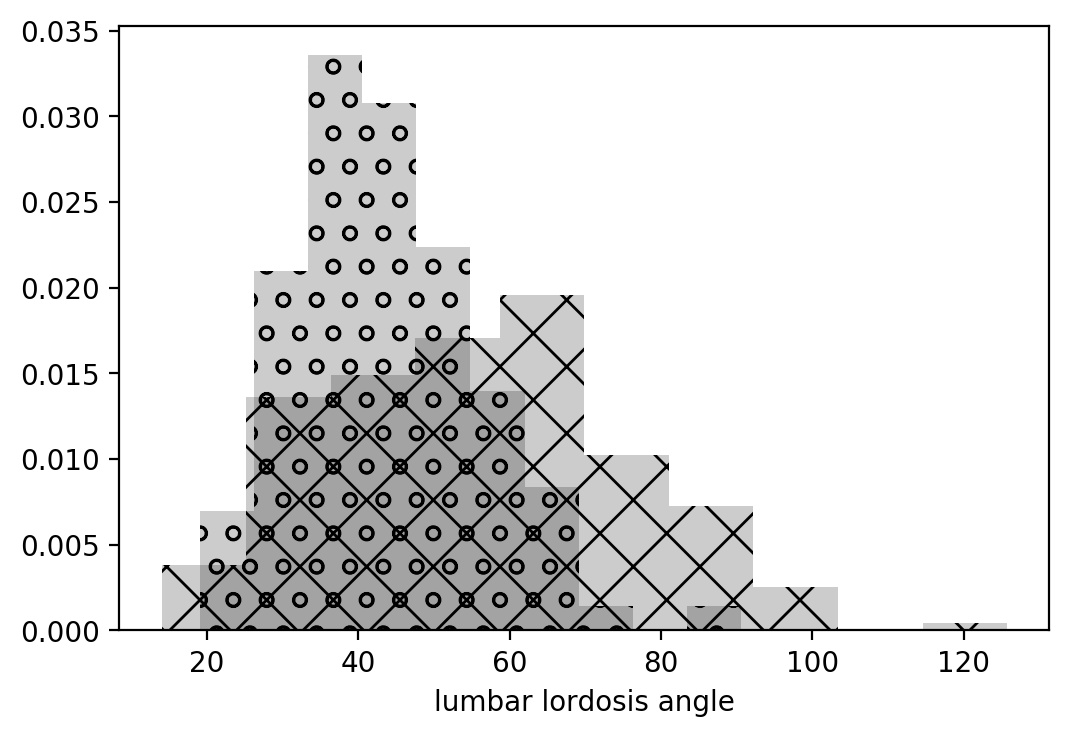

In [25]:
##################### LUMBAR LORDOSIS ANGLE ##########################
x_min = min(df.lumbar_lordosis_angle)
x_max = max(df.lumbar_lordosis_angle)
x_min = math.floor(x_min/10)*10
x_max = math.floor(x_max/10)*10
ax1.set_xlim(x_min, x_max)
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_prop_cycle(monochrome)

plt.xlabel('lumbar lordosis angle')
arr1, bin1, patch1 = ax1.hist(df.lumbar_lordosis_angle[df.Class_att == 'Normal'], hatch="o", alpha=0.2, density=True)
arr2, bin2, patch2 = ax1.hist(df.lumbar_lordosis_angle[df.Class_att == 'Abnormal'], hatch="x", alpha=0.2, density=True)
# for abnormal class - outlier detection
for val in df.lumbar_lordosis_angle:
    if val > 100:
        pass
        #print(val)

# for normal class - outlier detection. First need to retrieve only 'normal' class data
norm_data = df[df['Class_att'] == 'Normal']

for val in norm_data.lumbar_lordosis_angle:
    if val > 70: #looking at graph for last val in data that looks as if not an outlier
        pass
        #print(val)
plt.show()

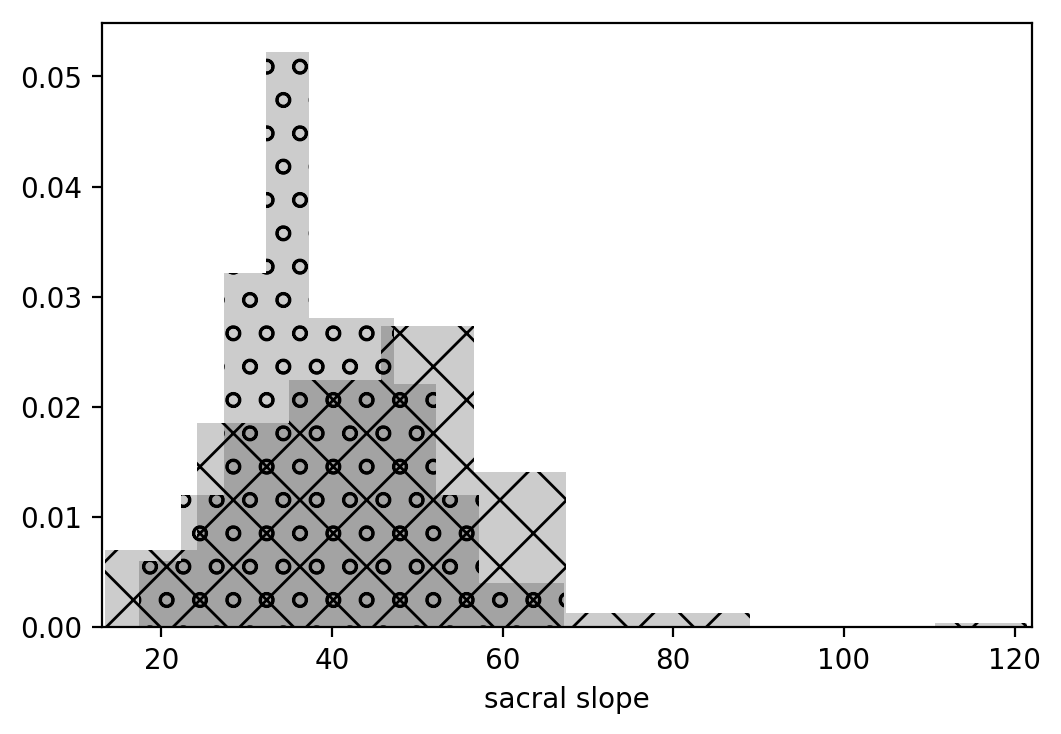

In [26]:
##################### SACRAL SLOPE ##########################
x_min = min(df.sacral_slope)
x_min = math.floor(x_min)
x_max = max(df.sacral_slope)
x_max = math.ceil(x_max)

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlim(x_min, x_max)
ax1.set_prop_cycle(monochrome)

plt.xlabel('sacral slope')
ax1.hist(df.sacral_slope[df.Class_att == 'Normal'], hatch="o", alpha=0.2, density = True)
ax1.hist(df.sacral_slope[df.Class_att == 'Abnormal'], hatch="x", alpha=0.2, density = True)
plt.show()

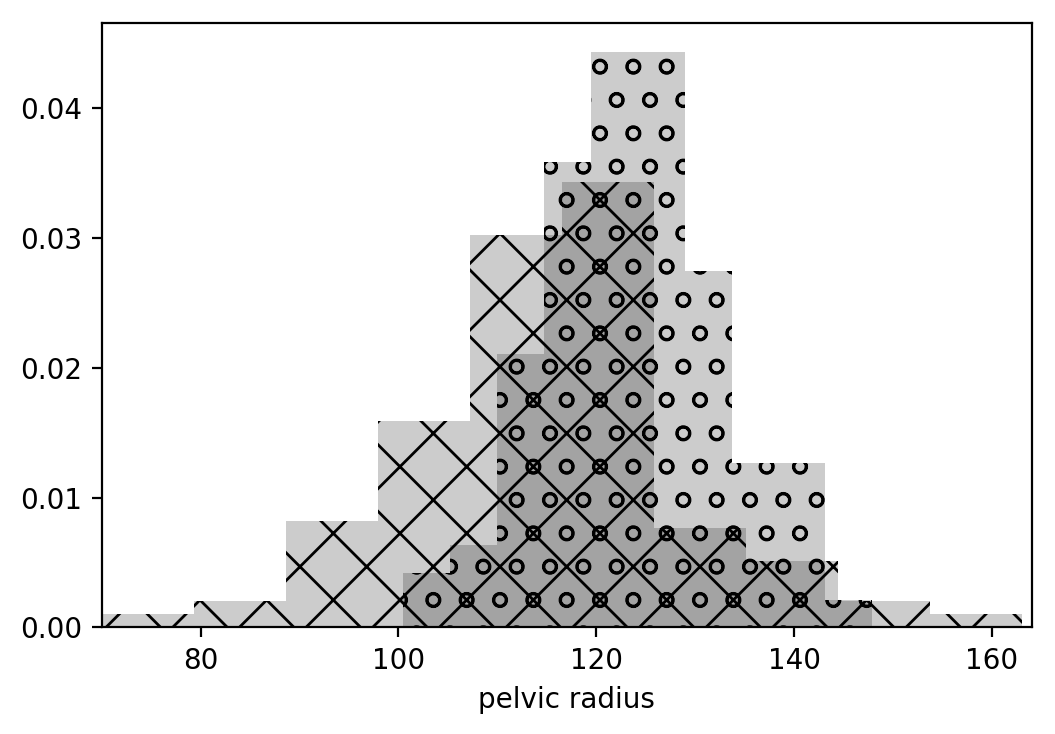

In [27]:
##################### PELVIC RADIUS ##########################
x_min = min(df.pelvic_radius)
x_min = math.floor(x_min)
x_max = max(df.pelvic_radius)
x_max = math.ceil(x_max)

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlim(x_min, x_max)
ax1.set_prop_cycle(monochrome)
plt.xlabel('pelvic radius')
ax1.hist(df.pelvic_radius[df.Class_att == 'Normal'], hatch="o", alpha=0.2, density=True)
ax1.hist(df.pelvic_radius[df.Class_att == 'Abnormal'], hatch="x", alpha=0.2, density=True)
plt.show()

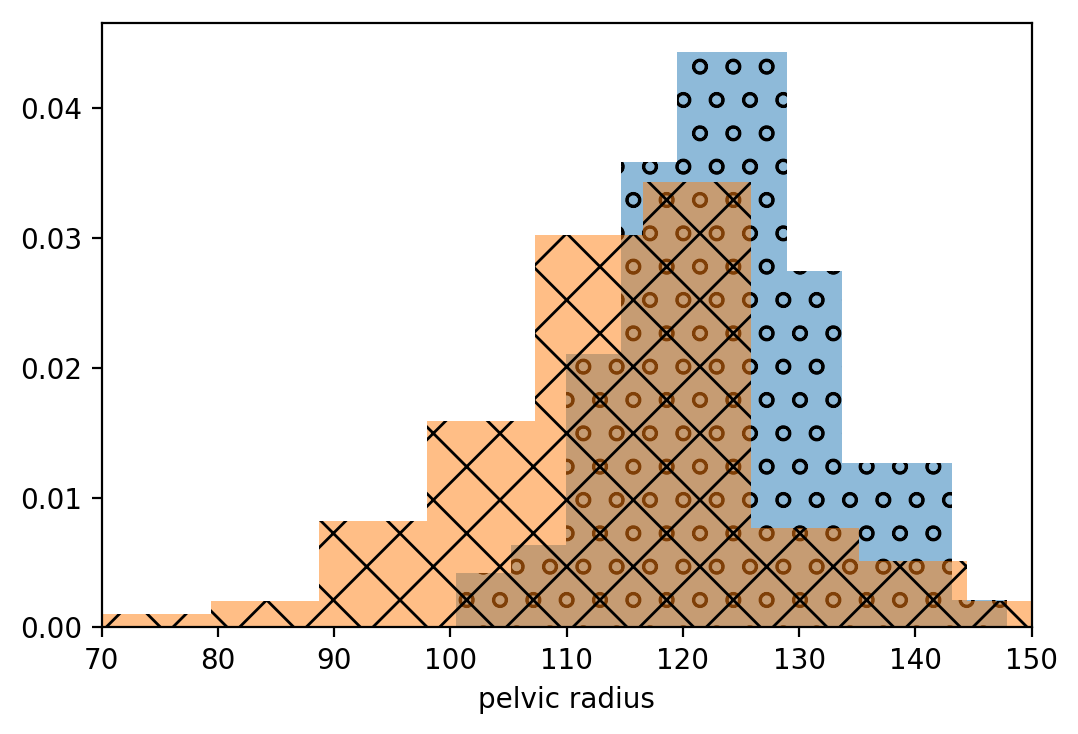

In [42]:
##################### PELVIC RADIUS ##########################
fig, ax = plt.subplots()
plt.xlabel('pelvic radius')
pr_normals= df.pelvic_radius[df.Class_att == 'Normal'].values
#print('normal values are: {}'.format(pr_normals))
pr_abnormals = df.pelvic_radius[df.Class_att == 'Abnormal'].values
#print('abnormal values are: {}'.format(pr_abnormals))
x_min = min(np.min(pr_normals), np.min(pr_abnormals))

x_max = min(np.max(pr_normals), np.max(pr_abnormals))
#print('max normals is: {}\nmax abnormals is: {}'.format(np.max(pr_normals), np.max(pr_abnormals)))

x_min = math.floor(x_min/10)*10

x_max = math.ceil(x_max/10)*10

x_lim = [x_min, x_max]

ax.hist(pr_normals, hatch="o", alpha=0.5, density=True)
ax.hist(pr_abnormals, hatch="x", alpha=0.5, density=True)
ax.set_xlim(x_lim)
ax.set_prop_cycle(monochrome)
plt.show()

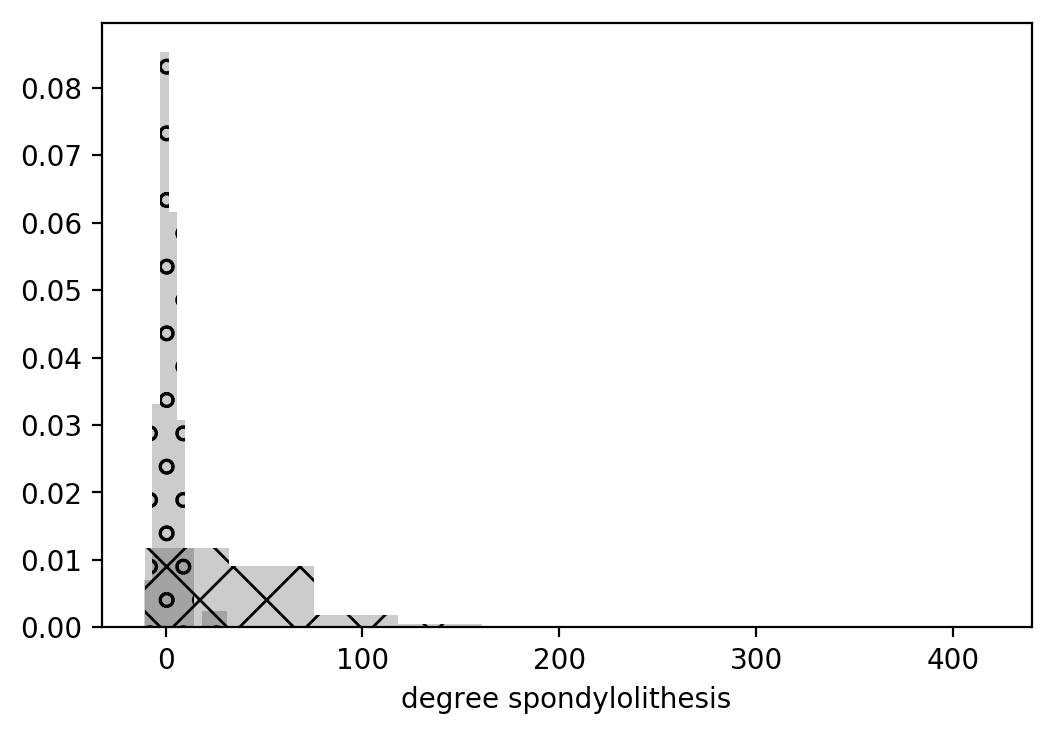

In [29]:
##################### DEGREE SPONDYLOLITHESIS ##########################
x_min = min(df.degree_spondylolisthesis)
x_min = math.floor(x_min)

x_max = max(df.degree_spondylolisthesis)
x_max = math.ceil(x_max)

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_prop_cycle(monochrome)

plt.xlabel('degree spondylolithesis')
n, bins, patches = ax1.hist(df.degree_spondylolisthesis[df.Class_att == 'Normal'], hatch="o", alpha=0.2, density=True)
n, bins, patches = ax1.hist(df.degree_spondylolisthesis[df.Class_att == 'Abnormal'], hatch="x", alpha=0.2, density=True)
plt.show()

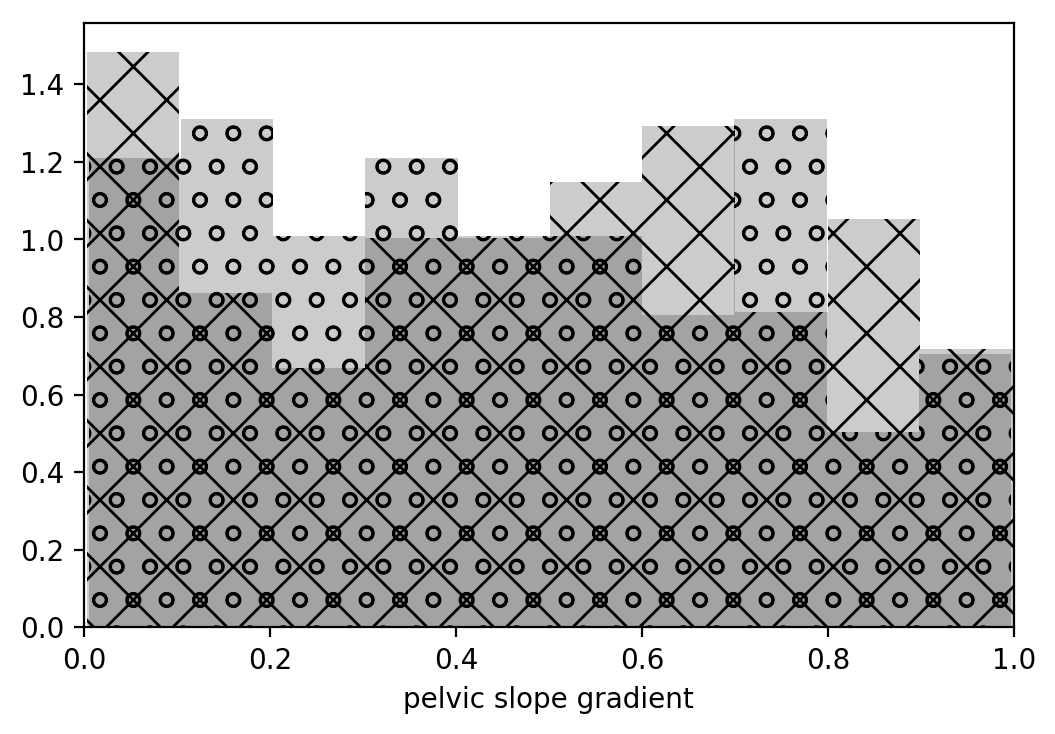

In [30]:
##################### PELVIC SLOPE ##########################
x_min = min(df.pelvic_slope)
x_min = math.floor(x_min)
x_max = max(df.pelvic_slope)
x_max = math.ceil(x_max)

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlim(x_min, x_max)
ax1.set_prop_cycle(monochrome)

plt.xlabel('pelvic slope gradient')
ax1.hist(df.pelvic_slope[df.Class_att == 'Normal'], hatch="o", alpha=0.2, density=True)
ax1.hist(df.pelvic_slope[df.Class_att == 'Abnormal'], hatch="x", alpha=0.2, density=True)
plt.show()

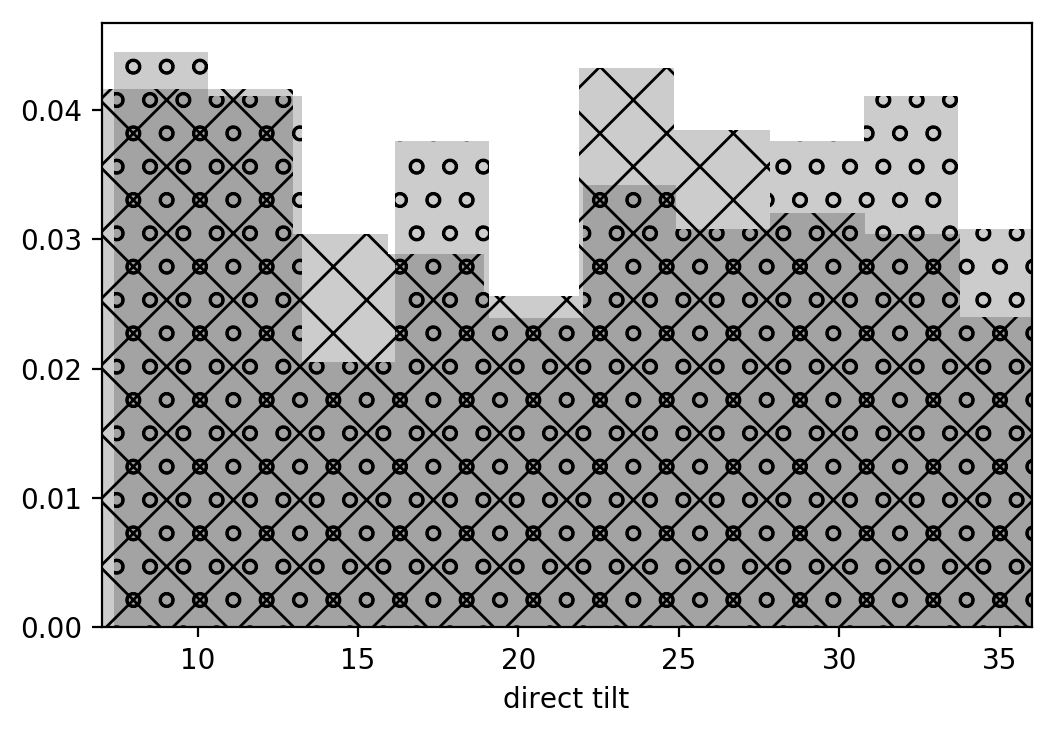

In [31]:
##################### DIRECT TILT ##########################
x_min = min(df.direct_tilt)
x_min = math.floor(x_min)

x_max = max(df.direct_tilt)
x_max = math.floor(x_max)

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

ax1.set_xlim(x_min, x_max)
ax1.set_prop_cycle(monochrome)

plt.xlabel('direct tilt')
ax1.hist(df.direct_tilt[df.Class_att == 'Normal'], hatch="o", alpha=0.2, density=True)
ax1.hist(df.direct_tilt[df.Class_att == 'Abnormal'], hatch="x", alpha=0.2, density=True)
plt.show()

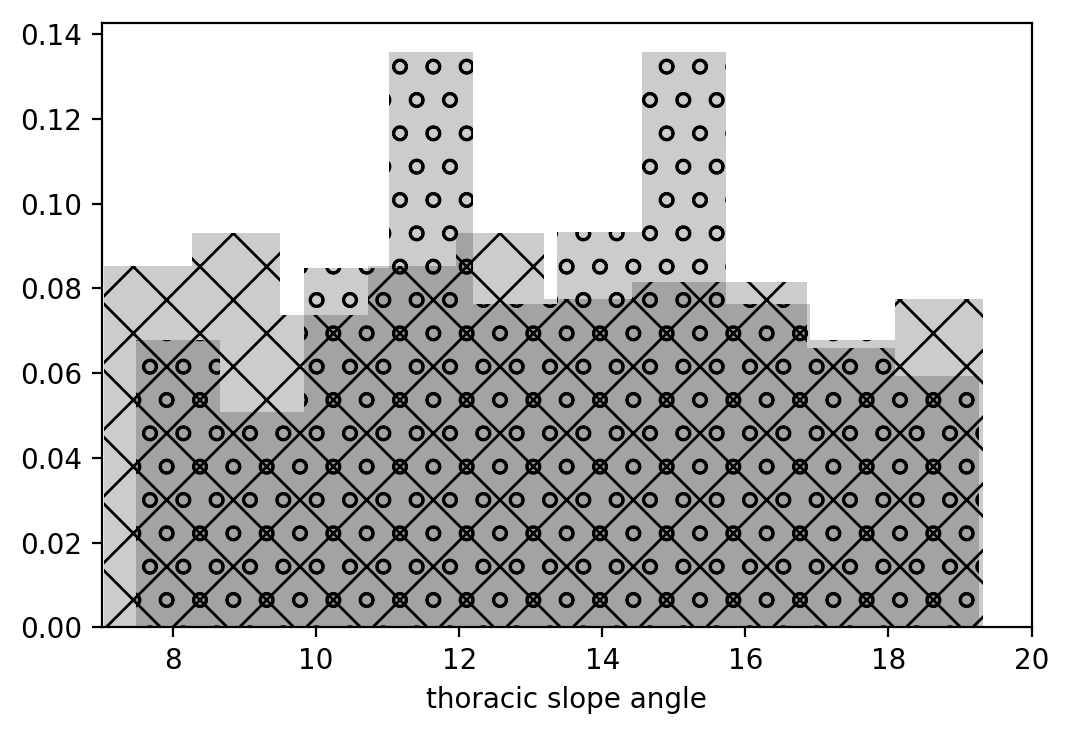

In [32]:
##################### THORACIC SLOPE ##########################
x_min = min(df.thoracic_slope)
x_min = math.floor(x_min)

x_max = max(df.thoracic_slope)
x_max = math.ceil(x_max)

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlim(x_min, x_max)
ax1.set_prop_cycle(monochrome)

plt.xlabel('thoracic slope angle')
ax1.hist(df.thoracic_slope[df.Class_att == 'Normal'], hatch="o", alpha=0.2, density=True)
ax1.hist(df.thoracic_slope[df.Class_att == 'Abnormal'], hatch="x", alpha=0.2, density=True)
plt.show()

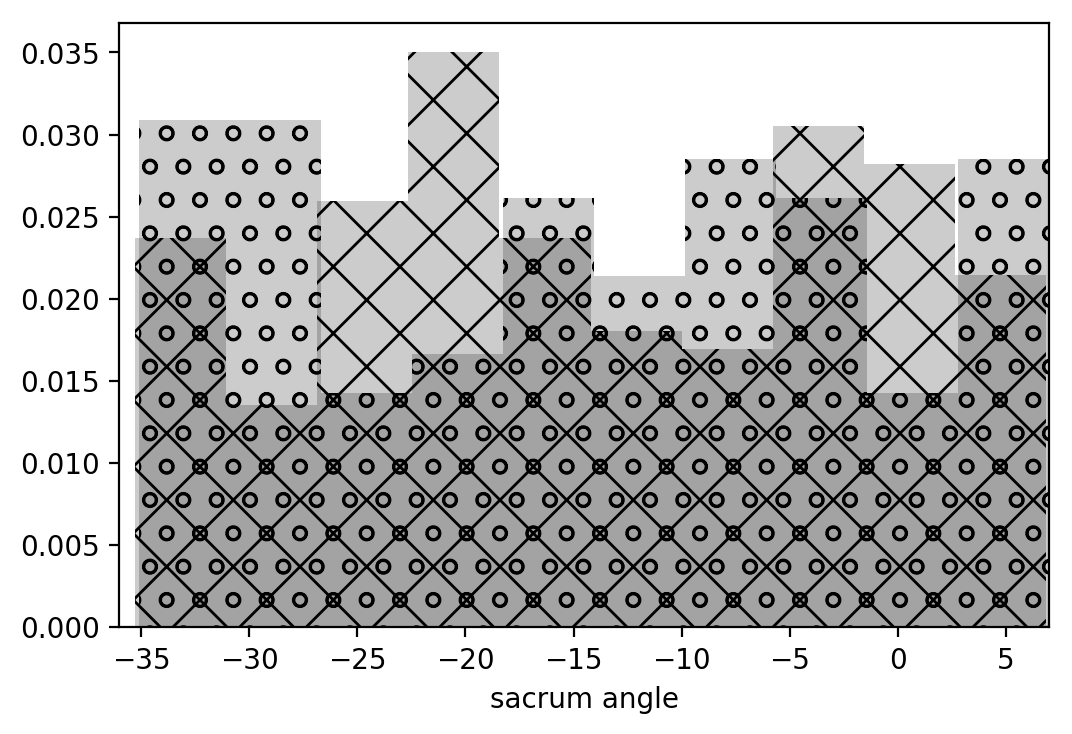

In [33]:
##################### SACRUM ANGLE ##########################
x_min = min(df.sacrum_angle)
x_min = math.floor(x_min)

x_max = max(df.sacrum_angle)
x_max = math.ceil(x_max)

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlim(x_min, x_max)
ax1.set_prop_cycle(monochrome)

plt.xlabel('sacrum angle')
ax1.hist(df.sacrum_angle[df.Class_att == 'Normal'], hatch="o", alpha=0.2, density=True)
ax1.hist(df.sacrum_angle[df.Class_att == 'Abnormal'], hatch="x", alpha=0.2, density=True)
plt.show()

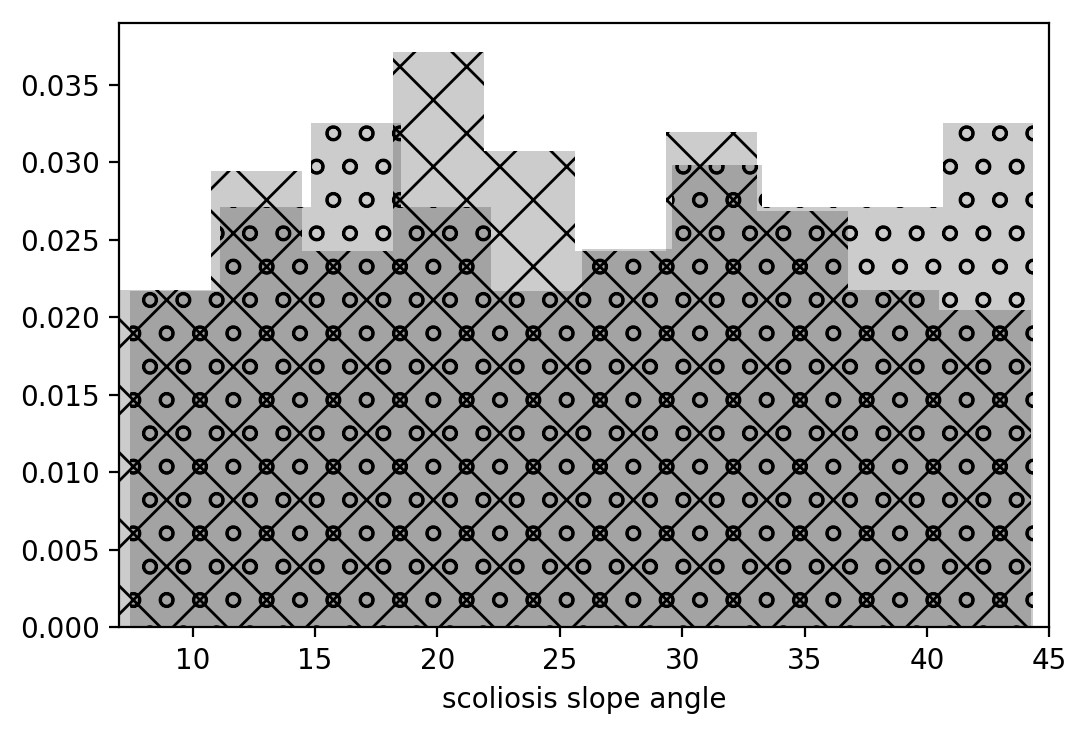

In [34]:
##################### SCOLIOSIS SLOPE ##########################
x_min = min(df.scoliosis_slope)
x_min = math.floor(x_min)

x_max = max(df.scoliosis_slope)
x_max = math.ceil(x_max)

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

ax1.set_xlim(x_min, x_max)
ax1.set_prop_cycle(monochrome)

plt.xlabel('scoliosis slope angle')
ax1.hist(df.scoliosis_slope[df.Class_att == 'Normal'], hatch="o", alpha=0.2, density=True)
ax1.hist(df.scoliosis_slope[df.Class_att == 'Abnormal'], hatch="x", alpha=0.2, density=True)
plt.show()